In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
model_df=pd.read_csv('model_df.csv')
model_df.head()

,Unnamed: 0,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,moa_encoded,cbkid_encoded
0,0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,...,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,1.0,256.0
1,1,-2.434752,-0.534423,-1.569052,-2.308481,-1.798197,2.235688,2.859903,0.115828,-0.318770,...,0.153519,-0.152950,1.137231,3.155821,-1.090688,-0.961780,-0.225351,2.082146,1.0,17.0
2,2,-1.407123,-1.580495,1.503462,-0.971894,-0.767465,0.929572,-3.707079,-1.433107,-1.451932,...,-5.455279,-1.076615,4.014021,-0.710926,-1.180859,6.546944,9.815185,-5.949243,1.0,123.0
3,3,-2.572814,-0.493766,-0.661199,0.284410,1.935428,-0.268836,1.669012,-3.439517,0.040008,...,1.996866,-4.780402,1.129777,4.231125,0.610161,-1.952749,-2.363208,1.150569,1.0,195.0
4,4,-0.711911,2.387836,0.502729,0.553082,-0.425526,-0.521758,3.677984,2.032266,-0.132177,...,1.485334,1.270336,1.549396,1.252517,-1.792015,-0.740876,-5.224329,-0.961893,1.0,115.0


In [8]:
model_df=model_df.drop(columns=['Unnamed: 0'])
model_df.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,moa_encoded,cbkid_encoded
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,1.0,256.0


In [21]:
meta = model_df[['moa_encoded','cbkid_encoded']]
feat = model_df[[col for col in model_df if col not in meta.columns]]

In [22]:
import scanpy as sc
adata = sc.AnnData(X=feat,obs=meta)
adata

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 8866 × 769
    obs: 'moa_encoded', 'cbkid_encoded'

In [23]:
adata.X = np.clip(adata.X, a_min=-20, a_max=20)

In [24]:
clipped_df = pd.concat([adata.obs, pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs_names)], axis=1)
clipped_df.head()

,moa_encoded,cbkid_encoded,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm
0,1.0,256.0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,...,2.320455,-0.161963,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049
1,1.0,17.0,-2.434752,-0.534423,-1.569052,-2.308481,-1.798197,2.235688,2.859903,0.115828,...,0.246075,-0.379477,0.153519,-0.152950,1.137231,3.155821,-1.090688,-0.961780,-0.225351,2.082146
2,1.0,123.0,-1.407123,-1.580495,1.503462,-0.971894,-0.767465,0.929572,-3.707079,-1.433107,...,7.141392,-6.466655,-5.455279,-1.076615,4.014021,-0.710926,-1.180859,6.546944,9.815185,-5.949243
3,1.0,195.0,-2.572814,-0.493766,-0.661199,0.284410,1.935428,-0.268836,1.669012,-3.439517,...,-0.423587,1.460201,1.996866,-4.780402,1.129777,4.231125,0.610161,-1.952749,-2.363208,1.150569
4,1.0,115.0,-0.711911,2.387836,0.502729,0.553082,-0.425526,-0.521758,3.677984,2.032266,...,-0.151742,0.914824,1.485334,1.270336,1.549396,1.252517,-1.792015,-0.740876,-5.224329,-0.961893


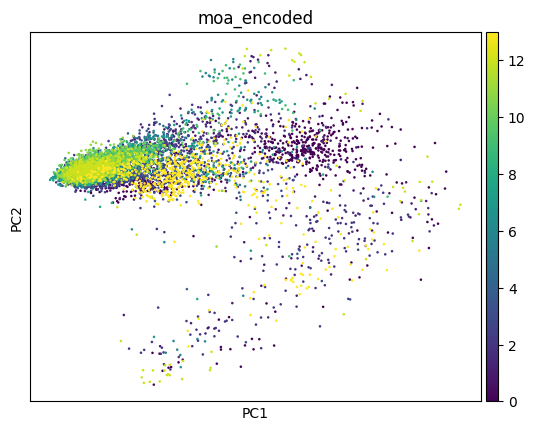

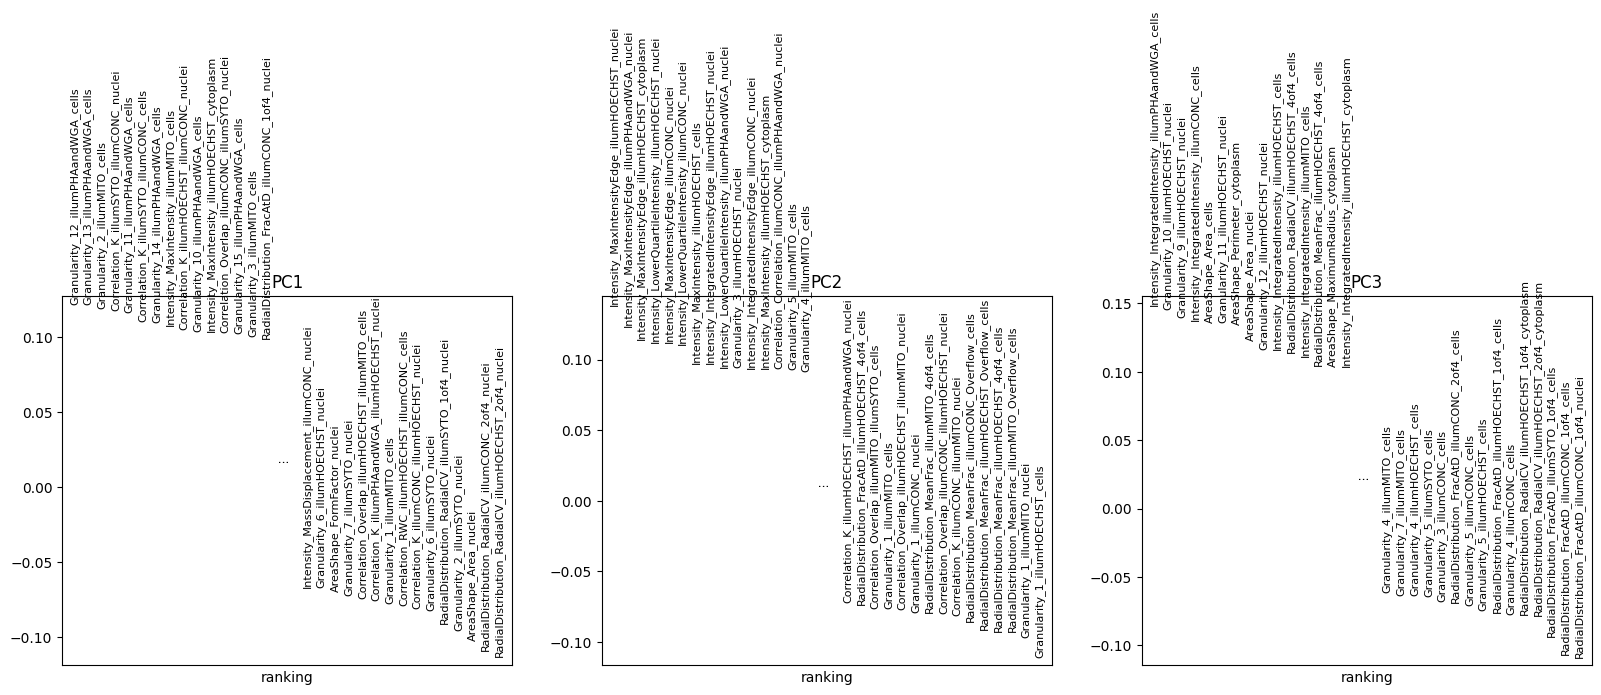

In [27]:
sc.tl.pca(adata,n_comps=250)
sc.pl.pca(adata,color='moa_encoded')
sc.pl.pca_loadings(adata)
#sc.pp.neighbors(adata,n_neighbors=10)
#sc.tl.umap(adata)
#sc.pl.umap(adata,color='moa_encoded')

In [29]:
MOA_Mapping = [
    ('CDK inhibitor', 0), 
    ('EGFR inhibitor', 1), 
    ('HDAC inhibitor', 2), 
    ('PI3K inhibitor', 3), 
    ('acetylcholine receptor antagonist', 4), 
    ('adrenergic receptor agonist', 5), 
    ('adrenergic receptor antagonist', 6), 
    ('calcium channel blocker', 7), 
    ('cyclooxygenase inhibitor', 8), 
    ('dopamine receptor antagonist', 9), 
    ('histamine receptor antagonist', 10), 
    ('phosphodiesterase inhibitor', 11), 
    ('serotonin receptor antagonist', 12), 
    ('topoisomerase inhibitor', 13)
]


In [73]:
feat

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,2.320455,-0.161963,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049
1,-2.434752,-0.534423,-1.569052,-2.308481,-1.798197,2.235688,2.859903,0.115828,-0.318770,-1.558695,...,0.246075,-0.379477,0.153519,-0.152950,1.137231,3.155821,-1.090688,-0.961780,-0.225351,2.082146
2,-1.407123,-1.580495,1.503462,-0.971894,-0.767465,0.929572,-3.707079,-1.433107,-1.451932,0.767384,...,7.141392,-6.466655,-5.455279,-1.076615,4.014021,-0.710926,-1.180859,6.546944,9.815185,-5.949243
3,-2.572814,-0.493766,-0.661199,0.284410,1.935428,-0.268836,1.669012,-3.439517,0.040008,1.307236,...,-0.423587,1.460201,1.996866,-4.780402,1.129777,4.231125,0.610161,-1.952749,-2.363208,1.150569
4,-0.711911,2.387836,0.502729,0.553082,-0.425526,-0.521758,3.677984,2.032266,-0.132177,-0.797386,...,-0.151742,0.914824,1.485334,1.270336,1.549396,1.252517,-1.792015,-0.740876,-5.224329,-0.961893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8861,-0.022305,0.724133,-0.940814,0.477272,-0.669174,-0.445414,0.847848,-0.720888,-0.201376,-0.620381,...,0.178879,2.957877,-0.815896,1.802347,-0.373183,4.106199,0.442600,-0.192785,-0.418966,-0.357317
8862,-0.921919,0.852659,-1.059174,-1.536504,-1.316162,1.451830,1.193166,0.963683,-0.375562,-0.914089,...,1.701807,-0.436714,1.171192,-1.394908,0.164031,-1.921861,-0.720995,0.742722,-0.024682,1.258300
8863,-1.256487,1.376167,-1.110767,-2.804509,-1.490365,2.670950,2.109894,0.795677,0.223616,-0.207477,...,1.145712,0.299858,-0.460467,-1.463145,-0.477632,-1.457610,0.496150,-1.686545,-0.117058,1.511713
8864,-0.565047,-0.764885,-0.349012,2.719824,1.388172,-2.503736,2.839878,-0.705655,0.111458,0.867170,...,0.685470,0.996841,2.491699,1.104376,0.863278,-0.882482,-1.864463,-1.276063,-1.796768,0.090072


In [46]:
numeric_df=clipped_df.drop(columns=['moa_encoded','cbkid_encoded'])
numeric_df.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,2.320455,-0.161963,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049


In [48]:
scaler=StandardScaler()
test_pca=scaler.fit_transform(numeric_df)
df_pca=pd.DataFrame(test_pca)

pca = PCA(n_components=250)
data_pca = pca.fit_transform(df_pca)
df_trans = pd.DataFrame(data=data_pca)


In [49]:
df_trans

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,3.871287,-7.252324,5.434123,5.954072,9.157286,-0.772510,-1.467245,-3.733730,-5.785249,-1.701317,...,-0.108268,-0.688002,-1.021232,-0.653557,0.330316,0.014985,0.595805,-0.009693,0.275747,0.176563
1,0.724354,-1.336677,-2.978793,-0.613552,7.083431,-3.424206,-1.227372,-0.530762,-0.481929,-1.355705,...,-0.335719,-0.544702,0.426335,0.447320,0.061324,-0.230934,0.217239,0.044543,0.369147,0.055067
2,0.867222,-11.540525,0.900689,1.286571,4.887158,-0.868376,-0.795840,3.199912,-5.503322,7.420662,...,0.403660,0.752795,-0.475400,0.065687,0.057185,1.680774,0.143992,0.236267,-0.446351,0.050870
3,2.007291,5.292655,1.264954,-1.378557,-2.340505,1.656283,1.121860,-0.312127,-4.564477,-2.252533,...,0.130046,0.215125,-0.630653,0.605307,0.353147,-0.486978,0.805458,-0.361066,0.345935,0.439511
4,-4.004895,-0.032445,1.866074,-0.599526,-1.915733,1.840489,0.715886,0.470811,-4.248797,-2.010719,...,-0.958589,0.387999,0.233877,0.041793,-0.602049,-0.820880,-0.062987,-0.231760,0.508571,-0.396125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8861,-2.865206,-0.508561,-1.371617,0.335676,-2.937137,-3.360097,4.185553,2.115944,1.242733,-3.444861,...,-0.624210,-0.263616,0.107095,0.379080,0.163887,-0.931042,0.230429,0.099179,0.663492,0.068050
8862,-7.211641,7.584630,-6.185219,-0.414042,3.597330,2.333095,0.374097,0.971017,-1.891775,0.320446,...,0.136258,-0.178087,0.114313,-0.156456,-0.176334,0.044886,-0.312231,-0.148146,0.210724,-0.098360
8863,-5.780349,1.250310,-2.060004,-1.043655,-1.975398,-0.124450,-0.194043,4.941299,1.796478,-0.512841,...,-0.151178,-0.754649,0.362857,-0.148807,0.145953,-0.580878,-0.103771,0.138313,0.005774,-0.204420
8864,-3.308868,0.372085,2.878616,2.725261,-3.012735,-0.347205,1.331731,2.751995,-0.501960,-2.066160,...,0.348930,-0.868451,-0.046981,0.001480,0.170060,-0.117837,-0.264444,0.477037,0.027191,0.410537


In [51]:
reduced_data = pd.concat([df_trans, meta], axis=1)

In [52]:
reduced_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,moa_encoded,cbkid_encoded
8861,-2.865206,-0.508561,-1.371617,0.335676,-2.937137,-3.360097,4.185553,2.115944,1.242733,-3.444861,...,0.107095,0.379080,0.163887,-0.931042,0.230429,0.099179,0.663492,0.068050,12.0,190.0
8862,-7.211641,7.584630,-6.185219,-0.414042,3.597330,2.333095,0.374097,0.971017,-1.891775,0.320446,...,0.114313,-0.156456,-0.176334,0.044886,-0.312231,-0.148146,0.210724,-0.098360,12.0,190.0
8863,-5.780349,1.250310,-2.060004,-1.043655,-1.975398,-0.124450,-0.194043,4.941299,1.796478,-0.512841,...,0.362857,-0.148807,0.145953,-0.580878,-0.103771,0.138313,0.005774,-0.204420,12.0,190.0
8864,-3.308868,0.372085,2.878616,2.725261,-3.012735,-0.347205,1.331731,2.751995,-0.501960,-2.066160,...,-0.046981,0.001480,0.170060,-0.117837,-0.264444,0.477037,0.027191,0.410537,12.0,190.0
8865,-6.419325,6.859084,-4.838354,-0.475896,7.280413,2.980000,-1.120997,1.257404,-0.321648,-0.213846,...,0.366709,-0.039757,0.464016,0.110181,-0.153119,-0.103017,0.239784,-0.088427,12.0,190.0


In [54]:
batch_ids_by_class = reduced_data.groupby('moa_encoded')['cbkid_encoded'].unique().to_dict()

# Step 2: Create a dictionary to hold train and test batch_ids
train_batches = []
test_batches = []

# Step 3: Split each class into train and test while ensuring batch_ids do not overlap
for moa_class, batch_ids in batch_ids_by_class.items():
    train, test = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    test_batches.extend(test)

# Step 4: Create the train and test DataFrames based on batch_ids
train_df = reduced_data[reduced_data['cbkid_encoded'].isin(train_batches)].reset_index(drop=True)
test_df = reduced_data[reduced_data['cbkid_encoded'].isin(test_batches)].reset_index(drop=True)

In [55]:
batch_ids_by_class = train_df.groupby('moa_encoded')['cbkid_encoded'].unique().to_dict()

# Step 2: Create a dictionary to hold train and validation batch_ids
train_batches = []
val_batches = []


for moa_class, batch_ids in batch_ids_by_class.items():
    train, val = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    val_batches.extend(val)

train_final_df = train_df[train_df['cbkid_encoded'].isin(train_batches)].reset_index(drop=True)
val_df = train_df[train_df['cbkid_encoded'].isin(val_batches)].reset_index(drop=True)

In [56]:
train_final_df=train_final_df.drop(columns=['cbkid_encoded'],inplace=False)
val_df=val_df.drop(columns=['cbkid_encoded'],inplace=False)
test_df=test_df.drop(columns=['cbkid_encoded'],inplace=False)

In [57]:
X_train = train_final_df.drop(['moa_encoded'], axis=1)
y_train = train_final_df['moa_encoded']
X_val = val_df.drop(['moa_encoded'], axis=1)
y_val=val_df['moa_encoded']
X_test = test_df.drop(['moa_encoded'], axis=1)
y_test=test_df['moa_encoded']

In [58]:
scaler=StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s=scaler.transform(X_val)
X_test_s=scaler.transform(X_test)

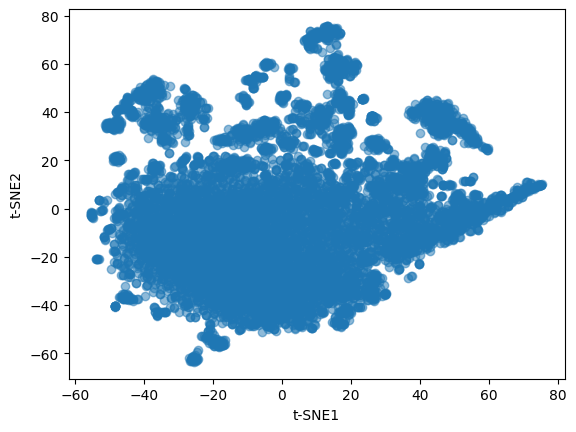

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(feat)  # Subsample if large

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

In [72]:
X_train_s.shape

(5338, 250)

In [75]:
feat.shape

(8866, 769)

In [76]:
model_df.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,moa_encoded,cbkid_encoded
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,1.0,256.0


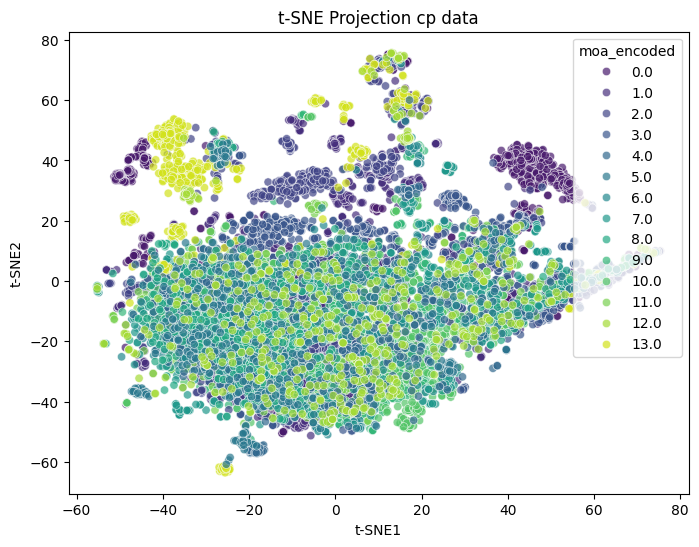

In [80]:
import seaborn as sns
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"])
tsne_df["moa_encoded"] = model_df["moa_encoded"].astype("category")  # Ensure the index aligns
palette = sns.color_palette("viridis", n_colors=len(tsne_df["moa_encoded"].cat.categories))
hue_order = sorted(tsne_df["moa_encoded"].unique())

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="moa_encoded",
    palette="viridis",  # Change palette as needed
    data=tsne_df,
    alpha=0.7
)

plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("t-SNE Projection cp data")
plt.legend(title="moa_encoded")
plt.show()